<a href="https://colab.research.google.com/github/himanshuarora1703/Tutorial-notebooks/blob/main/Early%20Stopping/Early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_blobs,make_classification
from sklearn.model_selection import train_test_split

In [39]:
# make the dataset

X,y = make_classification(n_samples=500,n_features=2,n_redundant=0)
X

array([[ 0.64920721,  1.55117713],
       [ 2.6208399 ,  1.39571121],
       [ 1.56601636,  1.27823751],
       [-0.39458495, -2.01729055],
       [ 1.07967142,  0.74905614],
       [-0.18990225,  1.12595462],
       [-1.10299838,  0.99393698],
       [ 1.15098898, -1.82654194],
       [ 0.81944189,  1.64578249],
       [ 0.30991289, -1.61130691],
       [-0.76478103, -0.76782642],
       [-1.04918861,  0.9733234 ],
       [ 1.1620287 , -0.2483688 ],
       [ 0.96549709, -1.4202364 ],
       [ 0.95559186,  0.7836177 ],
       [-0.48487452, -0.43266522],
       [-0.92751539,  0.99577691],
       [-1.83141414, -0.35324485],
       [ 0.56772688,  1.02509028],
       [ 1.10588904, -0.98579305],
       [-0.66508978, -0.38092773],
       [ 1.88142635,  1.84535347],
       [ 1.05965522, -1.29845171],
       [ 1.902839  ,  1.0630637 ],
       [ 0.29979345,  0.35379425],
       [-0.29235826,  0.82293271],
       [ 1.18107997, -1.44941771],
       [-2.38122689,  0.73303524],
       [-0.2607722 ,

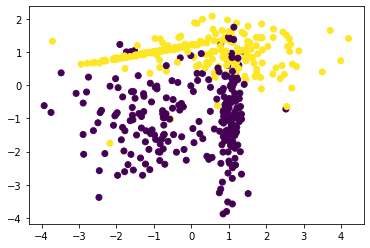

In [40]:
# make scatterplot

plt.scatter(X[:,0],X[:,1],c=y)

In [41]:
# make the model

model = Sequential()
model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                30        
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [43]:
# do train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [44]:
history = model.fit(X_train,y_train,batch_size=32,validation_split=0.2,epochs=1000)

Epoch 1/1000
10/10 [==============================] - 1s 21ms/step - loss: 0.7003 - accuracy: 0.4875 - val_loss: 0.6801 - val_accuracy: 0.5125
Epoch 2/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.6729 - accuracy: 0.4875 - val_loss: 0.6534 - val_accuracy: 0.5125
Epoch 3/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.6484 - accuracy: 0.4875 - val_loss: 0.6299 - val_accuracy: 0.5125
Epoch 4/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6284 - accuracy: 0.4875 - val_loss: 0.6085 - val_accuracy: 0.5125
Epoch 5/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.6094 - accuracy: 0.4875 - val_loss: 0.5887 - val_accuracy: 0.5125
Epoch 6/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.5921 - accuracy: 0.5531 - val_loss: 0.5705 - val_accuracy: 0.6625
Epoch 7/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.5763 - accuracy: 0.6469 - val_loss: 0.5533 - val_accuracy: 0.7500
Epoch

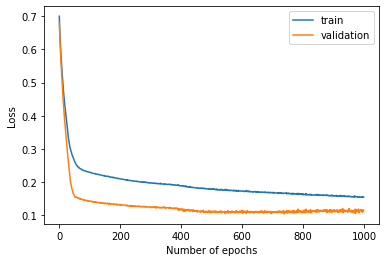

In [45]:
# plot the loss through the epochs

plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

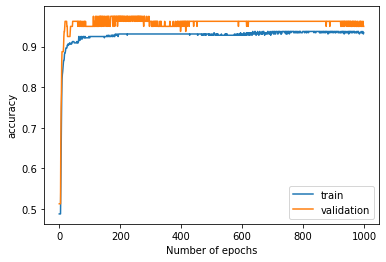

In [46]:
# plot the accuracy through the epochs

plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('accuracy')
plt.show()

In [34]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(min_delta=0.001,patience=30)

In [35]:
call_history = model.fit(X_train,y_train,batch_size=32,validation_split=0.2,epochs=1000,callbacks=early_stop)

Epoch 1/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0669 - accuracy: 0.9719 - val_loss: 0.1962 - val_accuracy: 0.9375
Epoch 2/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0660 - accuracy: 0.9719 - val_loss: 0.1930 - val_accuracy: 0.9500
Epoch 3/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.0660 - accuracy: 0.9781 - val_loss: 0.1959 - val_accuracy: 0.9500
Epoch 4/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0656 - accuracy: 0.9781 - val_loss: 0.1947 - val_accuracy: 0.9500
Epoch 5/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0659 - accuracy: 0.9750 - val_loss: 0.1961 - val_accuracy: 0.9375
Epoch 6/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.0658 - accuracy: 0.9750 - val_loss: 0.1943 - val_accuracy: 0.9500
Epoch 7/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0663 - accuracy: 0.9750 - val_loss: 0.1951 - val_accuracy: 0.9500
Epo

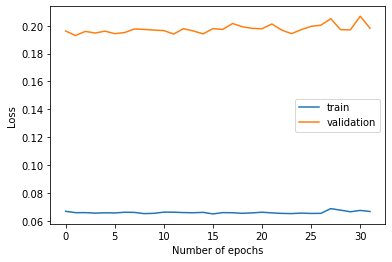

In [36]:
# plot the loss through the epochs

plt.plot(call_history.history['loss'],label='train')
plt.plot(call_history.history['val_loss'],label='validation')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

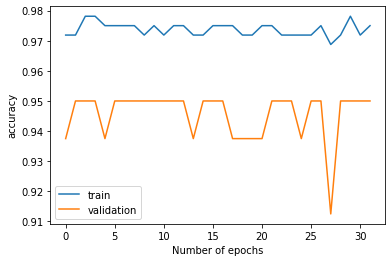

In [37]:
# plot the accuracy through the epochs

plt.plot(call_history.history['accuracy'],label='train')
plt.plot(call_history.history['val_accuracy'],label='validation')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('accuracy')
plt.show()